In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
from src.evaluation import Evaluator

In [3]:
## This cell would need for testing phase - Ignore this
%load_ext autoreload
%autoreload 2

In [4]:
paths=[]
for dataset in os.scandir('experiments'):
    if not dataset.is_dir() or not 'chembl' in dataset.name:
        continue

    if 'chemblAug5' in dataset.name:
        for setup in os.scandir(dataset):
            if '2hl_512hu' in setup.name and '256bs' in setup.name:
                paths.append(setup.path)

    elif 'chembl' in dataset.name:
        for setup in os.scandir(dataset):
            if '2hl_512hu' in setup.name and '512bs' in setup.name:
                paths.append(setup.path)

In [5]:
paths

['experiments/chemblAug5_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'experiments/chemblAug5_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'experiments/chemblAug5_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'experiments/chembl_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'experiments/chembl_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'experiments/chembl_fragSMILES-RNN/2hl_512hu_512bs_300es_0.001lr',
 'experiments/chemblAug5_t-SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'experiments/chembl_t-SMILES-RNN/2hl_512hu_512bs_0.001lr']

In [20]:
evaluators = [Evaluator(path) for path in paths]

In [21]:
evaluators_table = pd.concat([evaluator.get_as_DFcell() for evaluator in evaluators ], ignore_index=True, axis=0)

In [22]:
evaluators_table = evaluators_table.drop(columns=['dataset','notation']).groupby(['aug','hl','hu','bs','lr']).agg(lambda x: x.dropna())

In [23]:
evaluators_table.map(lambda x: x.load_descriptors())

,,,,,SELFIES,SMILES,fragSMILES,t-SMILES
aug,hl,hu,bs,lr,,,,
1,2,512,512,0.001,True,True,True,True
5,2,512,256,0.001,True,True,True,True


In [30]:
descriptors = [
    'QED',
    'MW',
    'logP',
    'SA',
]

# Chembl aug 1

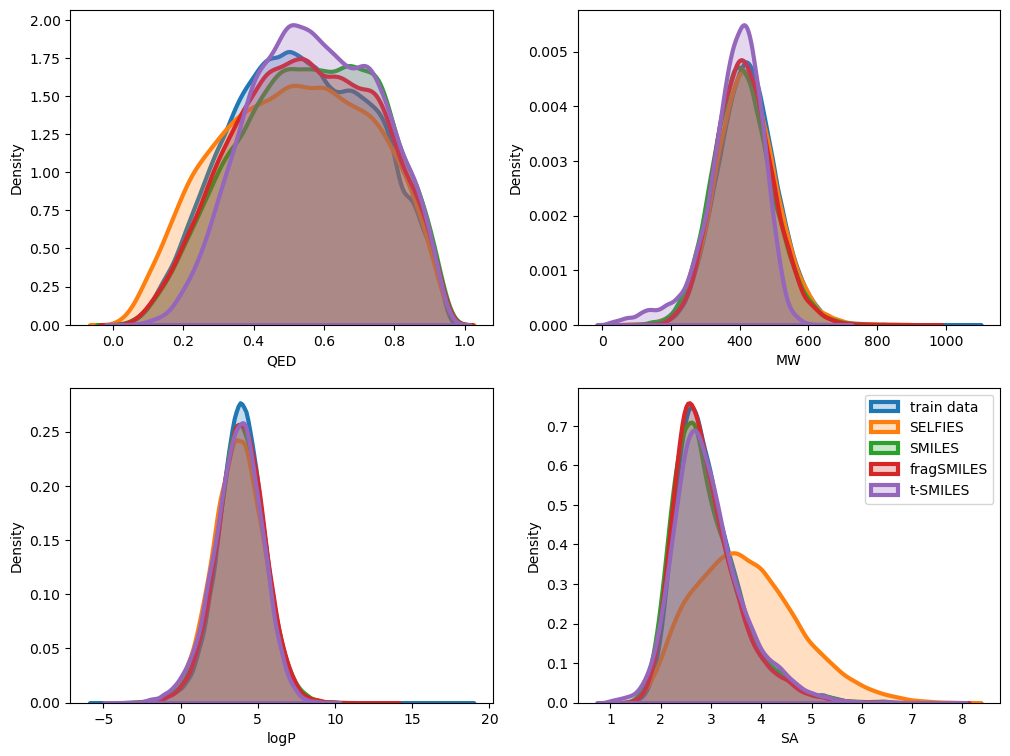

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))


for descriptor_name, ax in zip(descriptors, axes.flatten()):
        sns.kdeplot(Evaluator.train_data['chembl'][descriptor_name], 
                fill=True, linewidth=3,
                label='train data',
                ax=ax
                )
        for notation, evaluator in evaluators_table.iloc[0].items():
                sns.kdeplot(evaluator.descriptors[descriptor_name],
                                fill=True, linewidth=3,
                                label=notation,
                                ax=ax
                                )
plt.legend()

# Chembl aug 5

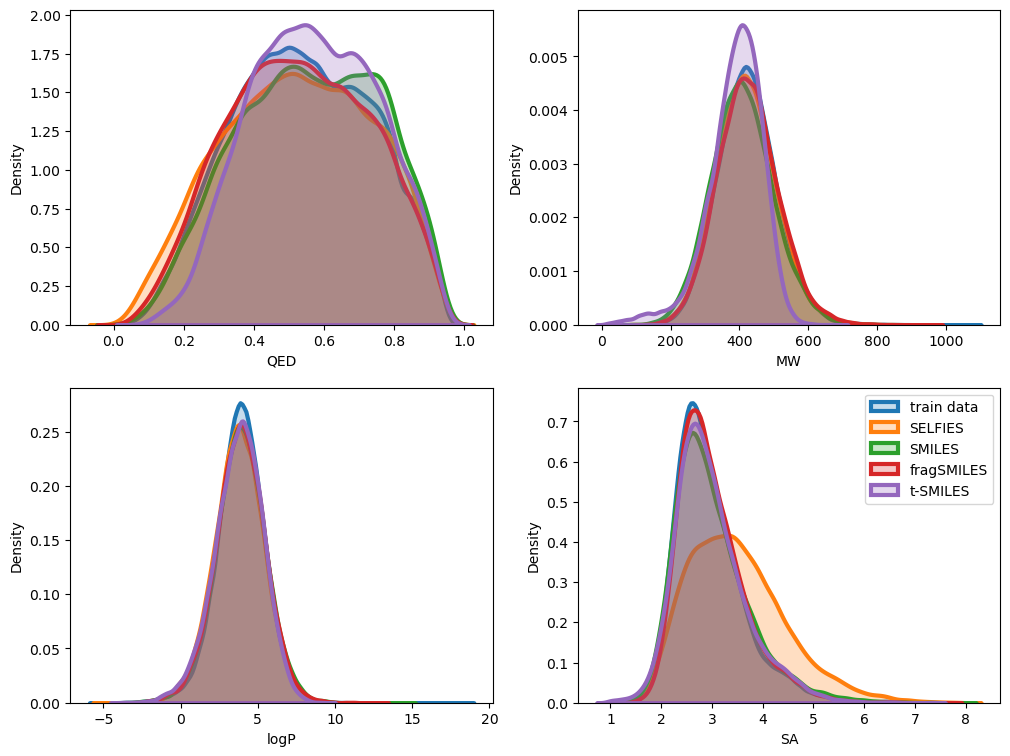

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))


for descriptor_name, ax in zip(descriptors, axes.flatten()):
        sns.kdeplot(Evaluator.train_data['chembl'][descriptor_name], 
                fill=True, linewidth=3,
                label='train data',
                ax=ax
                )
        for notation, evaluator in evaluators_table.iloc[1].items():
                sns.kdeplot(evaluator.descriptors[descriptor_name],
                                fill=True, linewidth=3,
                                label=notation,
                                ax=ax
                                )
plt.legend()

# moses

In [43]:
paths=[]
for dataset in os.scandir('experiments'):
    if not dataset.is_dir() or not 'moses' in dataset.name:
        continue

    for setup in os.scandir(dataset):
        if '3hl_256hu' in setup.name and '512bs' in setup.name:
            paths.append(setup.path)

In [44]:
paths

['experiments/moses_SELFIES-RNN/3hl_256hu_512bs_0.001lr',
 'experiments/moses_SMILES-RNN/3hl_256hu_512bs_0.001lr',
 'experiments/moses_fragSMILES-RNN/3hl_256hu_512bs_300es_0.001lr',
 'experiments/moses_t-SMILES-RNN/3hl_256hu_512bs_0.001lr']

In [45]:
evaluators = [Evaluator(path) for path in paths]

In [46]:
evaluators_table = pd.concat([evaluator.get_as_DFcell() for evaluator in evaluators ], ignore_index=True, axis=0)

In [47]:
evaluators_table = evaluators_table.drop(columns=['dataset','notation']).groupby(['aug','hl','hu','bs','lr']).agg(lambda x: x.dropna())

In [48]:
evaluators_table.map(lambda x: x.load_descriptors())

,,,,,SELFIES,SMILES,fragSMILES,t-SMILES
aug,hl,hu,bs,lr,,,,
1,3,256,512,0.001,True,True,True,True


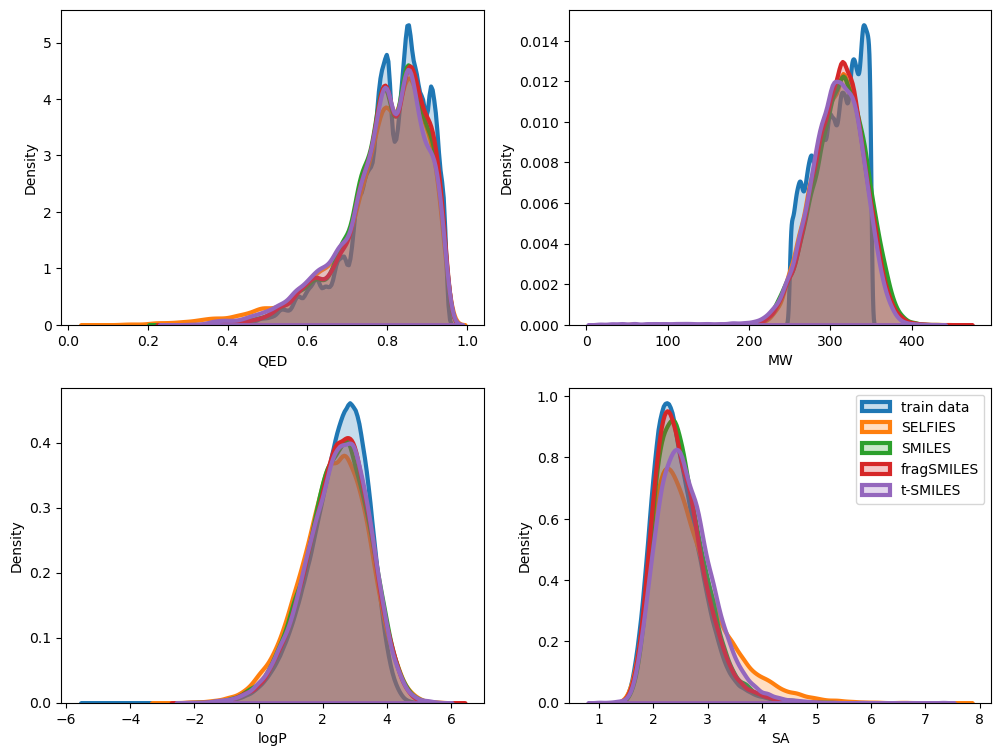

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))


for descriptor_name, ax in zip(descriptors, axes.flatten()):
        sns.kdeplot(Evaluator.train_data['moses'][descriptor_name], 
                fill=True, linewidth=3,
                label='train data',
                ax=ax
                )
        for notation, evaluator in evaluators_table.iloc[0].items():
                sns.kdeplot(evaluator.descriptors[descriptor_name],
                                fill=True, linewidth=3,
                                label=notation,
                                ax=ax
                                )
plt.legend()